In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extracting files into dataframes

In [2]:
def convert_pd(file: str) -> pd.DataFrame:
    """
    Convert a text file to a pandas DataFrame.

    Args:
        file (str): Path to the text file.

    Returns:
        pd.DataFrame: DataFrame containing the data from the text file.
    """
    df = pd.read_csv(file, header=None, delim_whitespace=True)
    return df

def get_y(file: str) -> np.ndarray:
    """
    Extract a list of values from a text file.

    Args:
        file (str): Path to the text file.

    Returns:
        np.ndarray: Array containing the values from the file.
    """
    with open(file, 'r') as f:
        values = f.read().splitlines()
    return np.array(values, dtype=int) - 1

y_train = get_y('../train/y_train.txt')
y_test = get_y('../test/y_test.txt')

cols = ["body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y", "total_acc_z"]
labels = ['Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing', 'Laying']

In [3]:
def batch_convert(train: str):
    l = []
    for name in cols:
        p = convert_pd(f"../{train}/Inertial Signals/{name}_{train}.txt")
        l += [p]
    return l

train = batch_convert("train")
test = batch_convert("test")

C:\Users\tungq\AppData\Local\Temp\ipykernel_94776\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, header=None, delim_whitespace=True)
C:\Users\tungq\AppData\Local\Temp\ipykernel_94776\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, header=None, delim_whitespace=True)
C:\Users\tungq\AppData\Local\Temp\ipykernel_94776\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, header=None, delim_whitespace=True)
C:\Users\tungq\AppData\Local\Temp\ipykernel_94776\4212258228.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use

In [4]:
def get_by_item(data: list, num: int):
    rows = []
    for i in range(len(data)):
        rows.append(data[i].iloc[num, ].to_numpy())
    df = pd.DataFrame(rows)
    df = df.transpose()
    df.columns = cols
    return df

In [5]:
from tqdm import tqdm

groups = [("body_acc_x", "body_acc_y", "body_acc_z"), ("body_gyro_x", "body_gyro_y", "body_gyro_z"), ("total_acc_x", "total_acc_y", "total_acc_z")]
def get_whole_dataset(data: list, y: np.ndarray, minmax: int = 0) -> pd.DataFrame:
    """
    Get all data samples, concattenate them into one single DataFrame.
    Args:
        minmax (int): If 0: no-applied, 1: MinMax applied for features, 2: MinMax applied on groups of features
    """
    cols = ["body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y", "total_acc_z", "sample_id", "label"]
    id = 0
    total_df = []
    print(f"Extracting with MinMax: {minmax}")
    for i in tqdm(range(len(data[0])), desc="Processing samples"):
        df = {}
        if minmax == 2:
            # Find min-max for each group
            for group in groups:
                group_min = np.min([data[cols.index(feature)].iloc[i, ].min() for feature in group])
                group_max = np.max([data[cols.index(feature)].iloc[i, ].max() for feature in group])
                for feature in group:
                    df[feature] = (data[cols.index(feature)].iloc[i, ].to_numpy() - group_min) / (group_max - group_min)
            df["sample_id"] = id
            df["label"] = y[i]
        elif minmax == 1:
            df = {
                "body_acc_x": (data[0].iloc[i, ].to_numpy() - data[0].iloc[i, ].min()) / (data[0].iloc[i, ].max() - data[0].iloc[i, ].min()),
                "body_acc_y": (data[1].iloc[i, ].to_numpy() - data[1].iloc[i, ].min()) / (data[1].iloc[i, ].max() - data[1].iloc[i, ].min()),
                "body_acc_z": (data[2].iloc[i, ].to_numpy() - data[2].iloc[i, ].min()) / (data[2].iloc[i, ].max() - data[2].iloc[i, ].min()),
                "body_gyro_x": (data[3].iloc[i, ].to_numpy() - data[3].iloc[i, ].min()) / (data[3].iloc[i, ].max() - data[3].iloc[i, ].min()),
                "body_gyro_y": (data[4].iloc[i, ].to_numpy() - data[4].iloc[i, ].min()) / (data[4].iloc[i, ].max() - data[4].iloc[i, ].min()),
                "body_gyro_z": (data[5].iloc[i, ].to_numpy() - data[5].iloc[i, ].min()) / (data[5].iloc[i, ].max() - data[5].iloc[i, ].min()),
                "total_acc_x": (data[6].iloc[i, ].to_numpy() - data[6].iloc[i, ].min()) / (data[6].iloc[i, ].max() - data[6].iloc[i, ].min()),
                "total_acc_y": (data[7].iloc[i, ].to_numpy() - data[7].iloc[i, ].min()) / (data[7].iloc[i, ].max() - data[7].iloc[i, ].min()),
                "total_acc_z": (data[8].iloc[i, ].to_numpy() - data[8].iloc[i, ].min()) / (data[8].iloc[i, ].max() - data[8].iloc[i, ].min()),
                "sample_id": id,
                "label": y[i]
            }
        else:
            df = {
                "body_acc_x": data[0].iloc[i, ].to_numpy(),
                "body_acc_y": data[1].iloc[i, ].to_numpy(),
                "body_acc_z": data[2].iloc[i, ].to_numpy(),
                "body_gyro_x": data[3].iloc[i, ].to_numpy(),
                "body_gyro_y": data[4].iloc[i, ].to_numpy(),
                "body_gyro_z": data[5].iloc[i, ].to_numpy(),
                "total_acc_x": data[6].iloc[i, ].to_numpy(),
                "total_acc_y": data[7].iloc[i, ].to_numpy(),
                "total_acc_z": data[8].iloc[i, ].to_numpy(),
                "sample_id": id,
                "label": y[i]
            }
        total_df.append(df)
        id += 1
    df = pd.DataFrame(total_df)
    df.columns = cols
    return df

In [6]:
total_df = get_whole_dataset(test, y_test)
total_df.head()

Extracting with MinMax: 0


Processing samples: 100%|██████████| 2947/2947 [00:01<00:00, 2304.93it/s]


,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,sample_id,label
0,"[0.01165315, 0.01310909, 0.01126885, 0.0278307...","[-0.02939904, -0.03972867, -0.05240586, -0.052...","[0.1068262, 0.1524549, 0.2168462, 0.2025812, 0...","[0.4374637, 0.4682641, 0.4982574, 0.4793957, 0...","[0.5313492, 0.7210685, 0.5203284, 0.3726252, 0...","[0.1365279, 0.09762239, 0.08355578, 0.02286101...","[1.041216, 1.041803, 1.039086, 1.054768, 1.028...","[-0.2697959, -0.280025, -0.2926631, -0.2923837...","[0.02377977, 0.07629271, 0.1474754, 0.1399061,...",0,4
1,"[0.009279629, 0.004929711, 0.003953596, 0.0092...","[0.00665052, 0.01864973, 0.0155395, -0.0005741...","[-0.02631933, -0.02688753, -0.03663861, -0.045...","[0.1702878, 0.1752221, 0.1308618, 0.07885598, ...","[-0.06137388, -0.09536355, -0.1464495, -0.1261...","[0.05509624, 0.04334361, 0.05239831, 0.0597087...","[0.9991921, 0.9946787, 0.9935518, 0.9986743, 1...","[-0.2649349, -0.2532142, -0.2565887, -0.272951...","[0.1256164, 0.1256249, 0.1163814, 0.1075668, 0...",1,4
2,"[0.005731945, 0.00706565, 0.005109758, 0.00243...","[0.007304842, 0.007330912, 0.007153458, 0.0066...","[0.01021286, 0.01341419, 0.003646559, -0.00767...","[-0.0387265, -0.04728239, -0.05390624, -0.0594...","[-0.06024968, -0.0517562, -0.05042757, -0.0472...","[0.02928903, 0.02536597, 0.02482575, 0.0217230...","[0.9975931, 0.9989703, 0.9970574, 0.9944241, 0...","[-0.2639912, -0.2638194, -0.2638495, -0.264179...","[0.1507741, 0.1539427, 0.1441536, 0.132821, 0....",2,4
3,"[0.0004519467, 0.0006039382, -0.002484562, -0....","[-0.02380645, -0.02205069, -0.007101194, 0.004...","[-0.02700233, -0.02254782, -0.002648797, 0.022...","[-0.01012762, 0.00356441, -0.008478927, -0.027...","[0.003590409, 0.02460939, 0.02271388, -0.00596...","[0.008402927, -0.009533039, 0.001776758, 0.023...","[0.994564, 0.9947269, 0.9916483, 0.9895802, 0....","[-0.290593, -0.2888855, -0.2739894, -0.2620996...","[0.1111986, 0.1155026, 0.1352512, 0.1605266, 0...",3,4
4,"[-0.004362379, -0.002765392, -0.004904784, -0....","[-0.009464754, -0.008671401, -0.006774347, -0....","[-0.00146104, 0.003182453, 0.004068636, 0.0024...","[-0.03666528, -0.0402769, -0.03994979, -0.0401...","[-0.03242742, -0.03796004, -0.04271361, -0.041...","[0.01398331, 0.02053516, 0.02336173, 0.0212167...","[0.9881504, 0.9897109, 0.9875351, 0.9877212, 0...","[-0.2838965, -0.2832349, -0.2814705, -0.282318...","[0.1338332, 0.1385116, 0.139431, 0.1378515, 0....",4,4


# 2. Additional preprocessing

## Apply min-max by each features
This data was rescaled with Min-Max scale for the whole sample, but we'll try rescaling on each features

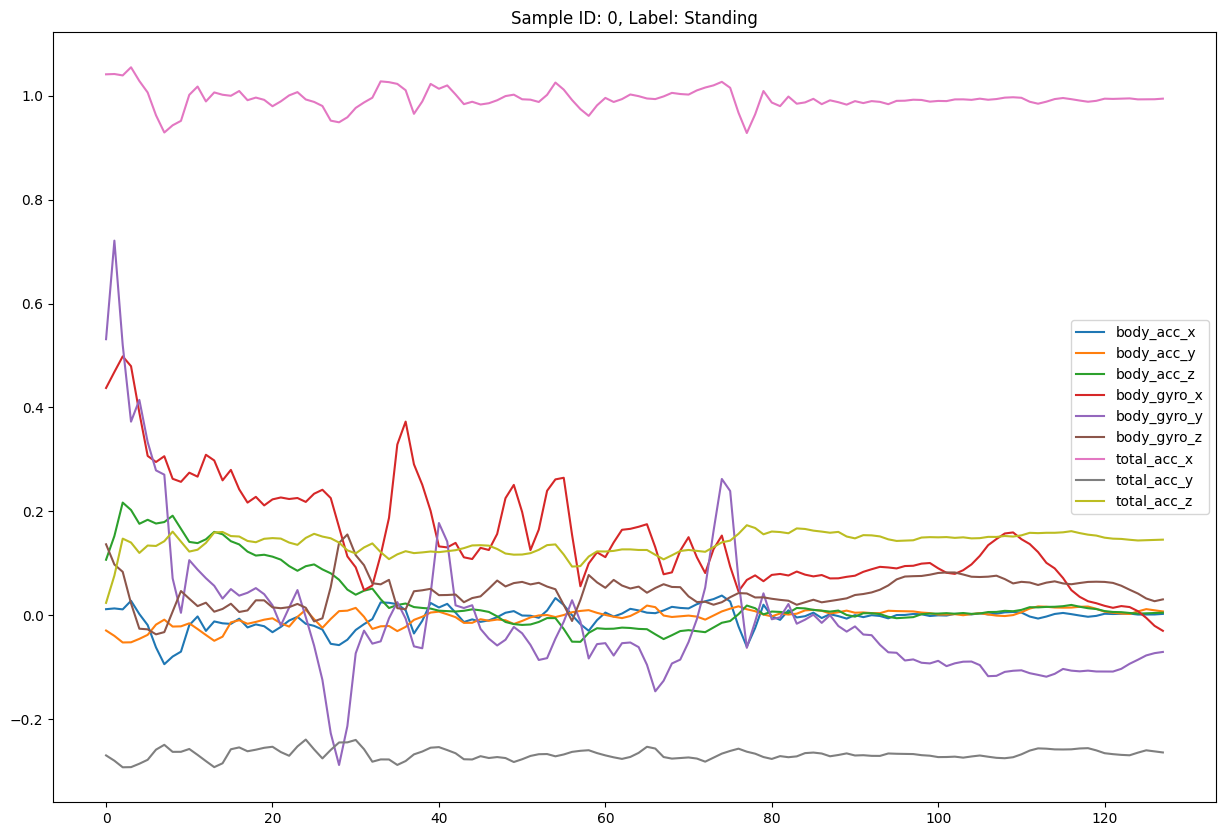

In [7]:
def row_to_df(row):
    """
    A row contains many arrays in cells, convert it to a DataFrame.
    """
    label = row['label']
    sample_id = row['sample_id']
    data = row.drop(['label', 'sample_id'])
    data = data.apply(pd.Series)
    return data.T, label, sample_id

def plot_data(num: int, data: pd.DataFrame):
    """
    Plot data with line plot
    """
    data, label, sample_id = row_to_df(data.iloc[num])
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.plot(data.iloc[:, i], label=col)
    plt.title(f"Sample ID: {sample_id}, Label: {labels[label]}")
    plt.legend()
    plt.show()

# Example usage
plot_data(0, total_df)

We can clearly see that big values lies on the columns of "totals", total columns are the sum of the respective accelerator axis plus 9.81 (m/s^2). That is why they are so big in value
-> Rescale Min-Max on each features

Extracting with MinMax: True


Processing samples: 100%|██████████| 2947/2947 [00:10<00:00, 286.55it/s]


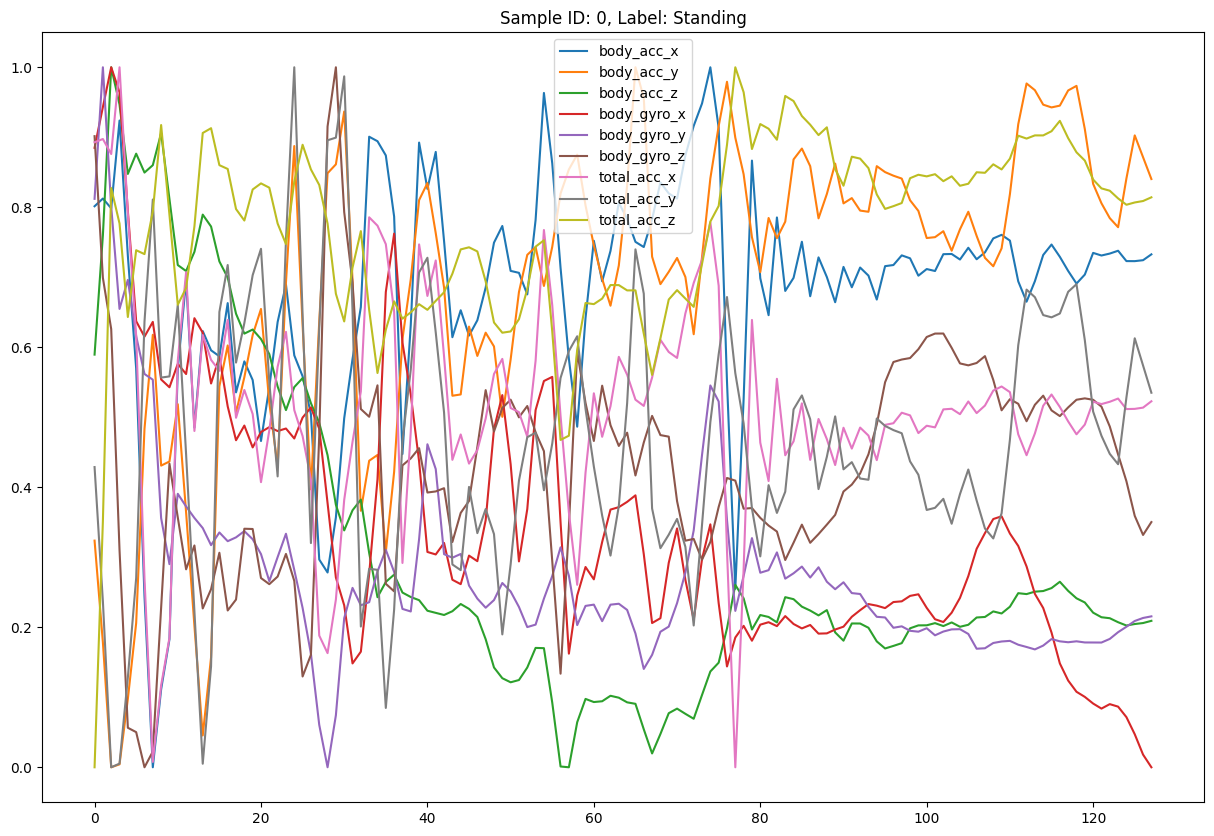

In [8]:
scaled_df = get_whole_dataset(test, y_test, minmax=True)
plot_data(0, scaled_df)

In [9]:
def denoise(df: pd.DataFrame, window_size: int = 5) -> pd.DataFrame:
    kernel = np.ones(window_size) / window_size

    def smooth(arr):
        arr = np.convolve(arr, kernel, mode='same')
        return arr[window_size//2 : -window_size//2]  # optional trimming

    return df.applymap(lambda arr: smooth(arr) if isinstance(arr, np.ndarray) else arr)

denoised_df = denoise(scaled_df, window_size=5)

C:\Users\tungq\AppData\Local\Temp\ipykernel_94776\2922392842.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda arr: smooth(arr) if isinstance(arr, np.ndarray) else arr)


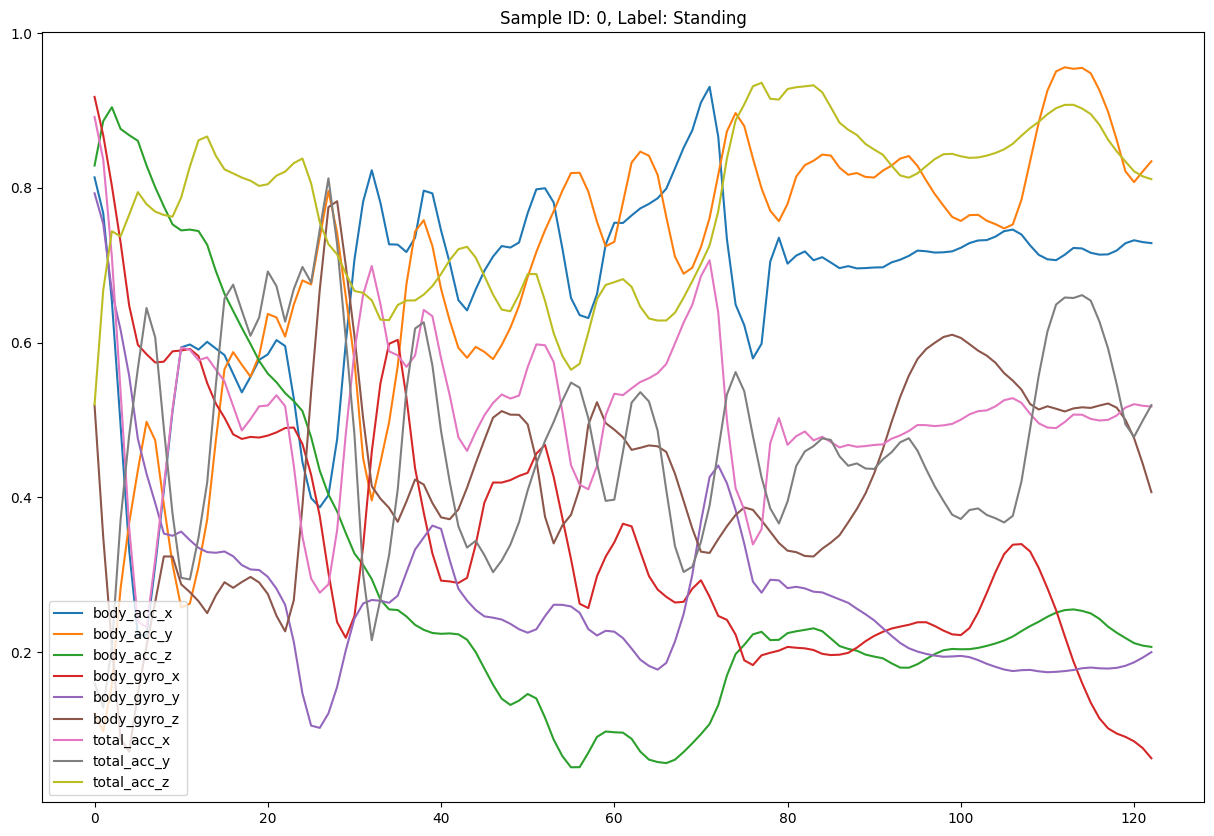

In [10]:
plot_data(0, denoised_df)

In [11]:
# # Save data
# denoised_df.to_csv('../structured_data/denoised_data.csv', index=False)
# scaled_df.to_csv('../structured_data/scaled_data.csv', index=False)
# total_df.to_csv('../structured_data/raw_data.csv', index=False)

# 3. Data patterns of unmoved activities

In [12]:
def get_data_by_label(df: pd.DataFrame, label: int, n: int) -> pd.DataFrame:
    """
    Get n random samples of data by label.
    """
    return df[df['label'] == label].sample(n=n, random_state=40)

In [39]:
group_scaled = get_whole_dataset(train, y_train, minmax=2)
samples = []
sample_number = 5
for i in range(3, 6):
    samples.append(get_data_by_label(group_scaled, i, sample_number))

Extracting with MinMax: 2


Processing samples: 100%|██████████| 7352/7352 [00:13<00:00, 561.12it/s]


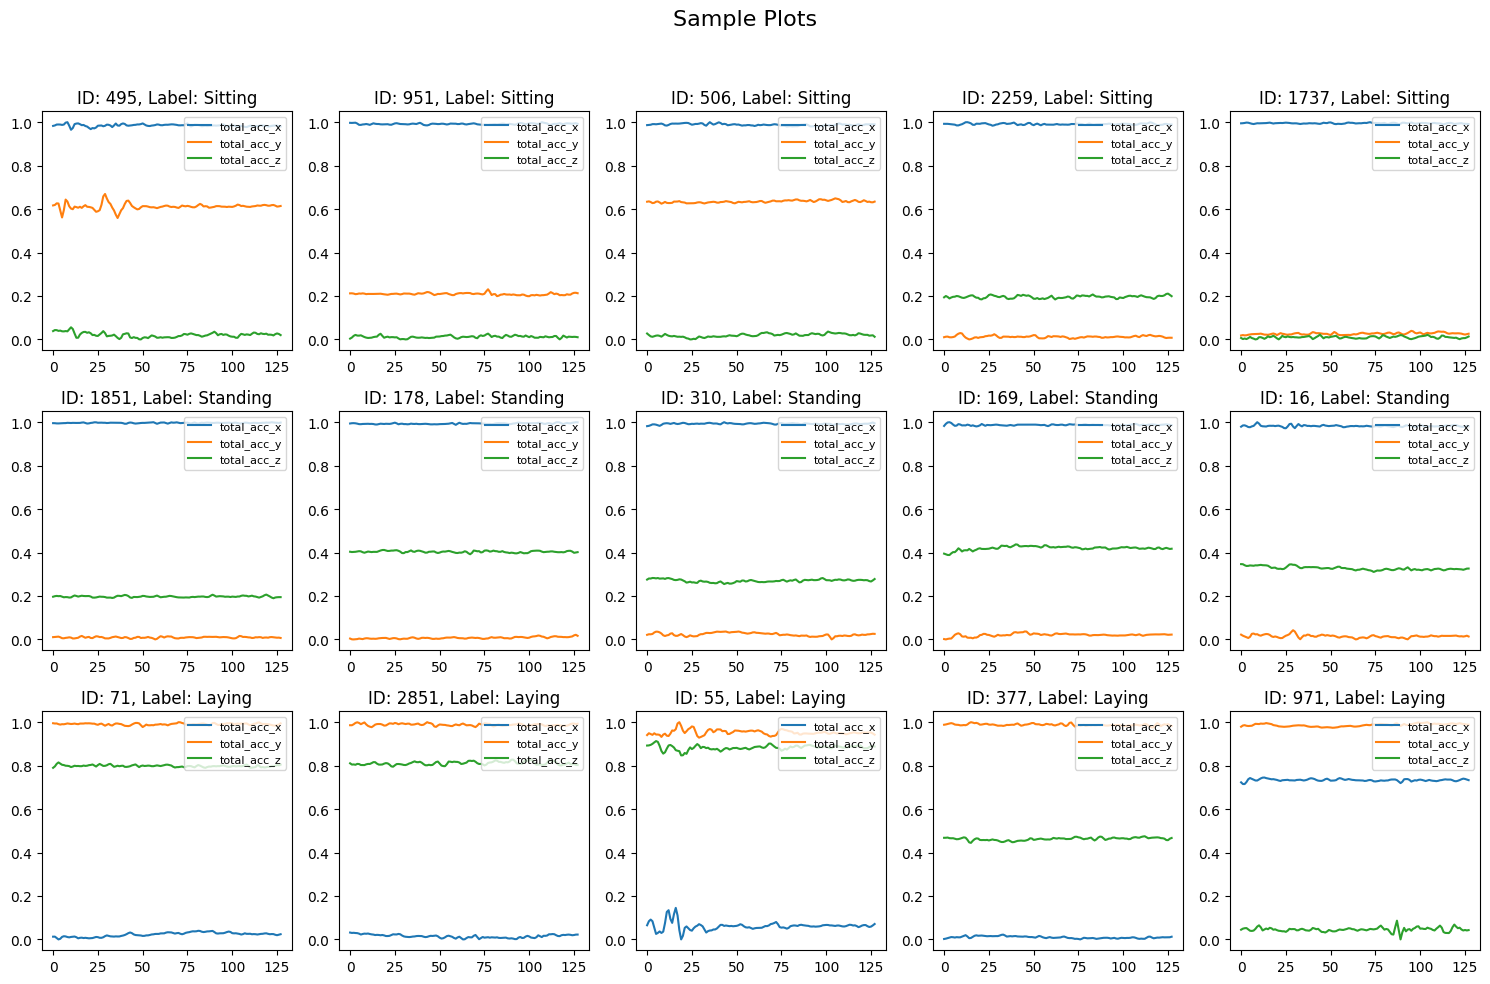

In [14]:
fig, axes = plt.subplots(3, sample_number, figsize=(15, 10))
fig.suptitle("Sample Plots", fontsize=16)

for i, sample_group in enumerate(samples):
    for j in range(sample_number):
        data, label, sample_id = row_to_df(sample_group.iloc[j])
        ax = axes[i, j]
        for col in groups[2]:
            ax.plot(data[col], label=col)
        ax.set_title(f"ID: {sample_id}, Label: {labels[label]}")
        ax.legend(loc="upper right", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

To classify non-moved activities, we can clearly see that:
- Sitting : total_ax > total_ay >= total_az
- Standing: total_ax > total_az >  total_ay
- Laying  : total_ay > total_az >  total_ax
--> Cannot be applied Min-Max on each feature, but applying Min-Max for groups: ax, ay, ax; gx, gy, gz; tax, tay, taz

# 4. Extracting statistical features

In [15]:
stats = ["max", "min", "mean", "std"]
def get_stats(df: pd.DataFrame, stats: str, num_samples = 1500):
    """
    Get statistics of the data by stats
    """
    sampled = df.sample(num_samples, random_state=40)
    # Create a new DataFrame to store the statistics
    stats_datas = []
    for i in tqdm(range(len(sampled)), desc="Calculating statistics"):
        row = sampled.iloc[i]
        cols_data = get_stats_by_row(row, stats)
        stats_datas.append(cols_data)
    # Create a DataFrame from the list of dictionaries
    stats_df = pd.DataFrame(stats_datas)
    return stats_df

def get_stats_by_row(row, stat: str) -> dict:
    cols_data = {}
    for col in cols:
        cols_data[col] = np.fromstring(str(row[col]).strip('[]'), sep=' ')
        if stat == "max":
            cols_data[col] = np.max(cols_data[col])
        elif stat == "min":
            cols_data[col] = np.min(cols_data[col])
        elif stat == "mean":
            cols_data[col] = np.mean(cols_data[col])
        elif stat == "std":
            cols_data[col] = np.std(cols_data[col])
    cols_data["sample_id"] = row["sample_id"]
    cols_data["label"] = row["label"]
    return cols_data

In [16]:
stats_data = {}
for stat in stats:
    stats_data[stat] = get_stats(group_scaled, stat)

Calculating statistics: 100%|██████████| 1500/1500 [00:07<00:00, 190.85it/s]


In [17]:
stats_data["max"].head()

,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,sample_id,label
0,1.000000,0.727646,0.723669,0.934344,0.983788,1.000000,1.0,0.332952,0.525168,2562,1
1,1.000000,0.621605,0.754695,1.000000,0.955843,0.844599,1.0,0.251348,0.471896,2031,1
2,1.000000,0.522530,0.521033,0.900429,1.000000,0.725924,1.0,0.258348,0.263429,2159,2
3,0.859233,1.000000,0.900565,0.819958,1.000000,0.997573,1.0,0.020697,0.142064,926,4
4,0.698234,0.878380,1.000000,1.000000,0.344063,0.318525,1.0,0.040860,0.105163,1224,4


In [18]:
stats_data["max"].head()

,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,sample_id,label
0,1.000000,0.727646,0.723669,0.934344,0.983788,1.000000,1.0,0.332952,0.525168,2562,1
1,1.000000,0.621605,0.754695,1.000000,0.955843,0.844599,1.0,0.251348,0.471896,2031,1
2,1.000000,0.522530,0.521033,0.900429,1.000000,0.725924,1.0,0.258348,0.263429,2159,2
3,0.859233,1.000000,0.900565,0.819958,1.000000,0.997573,1.0,0.020697,0.142064,926,4
4,0.698234,0.878380,1.000000,1.000000,0.344063,0.318525,1.0,0.040860,0.105163,1224,4


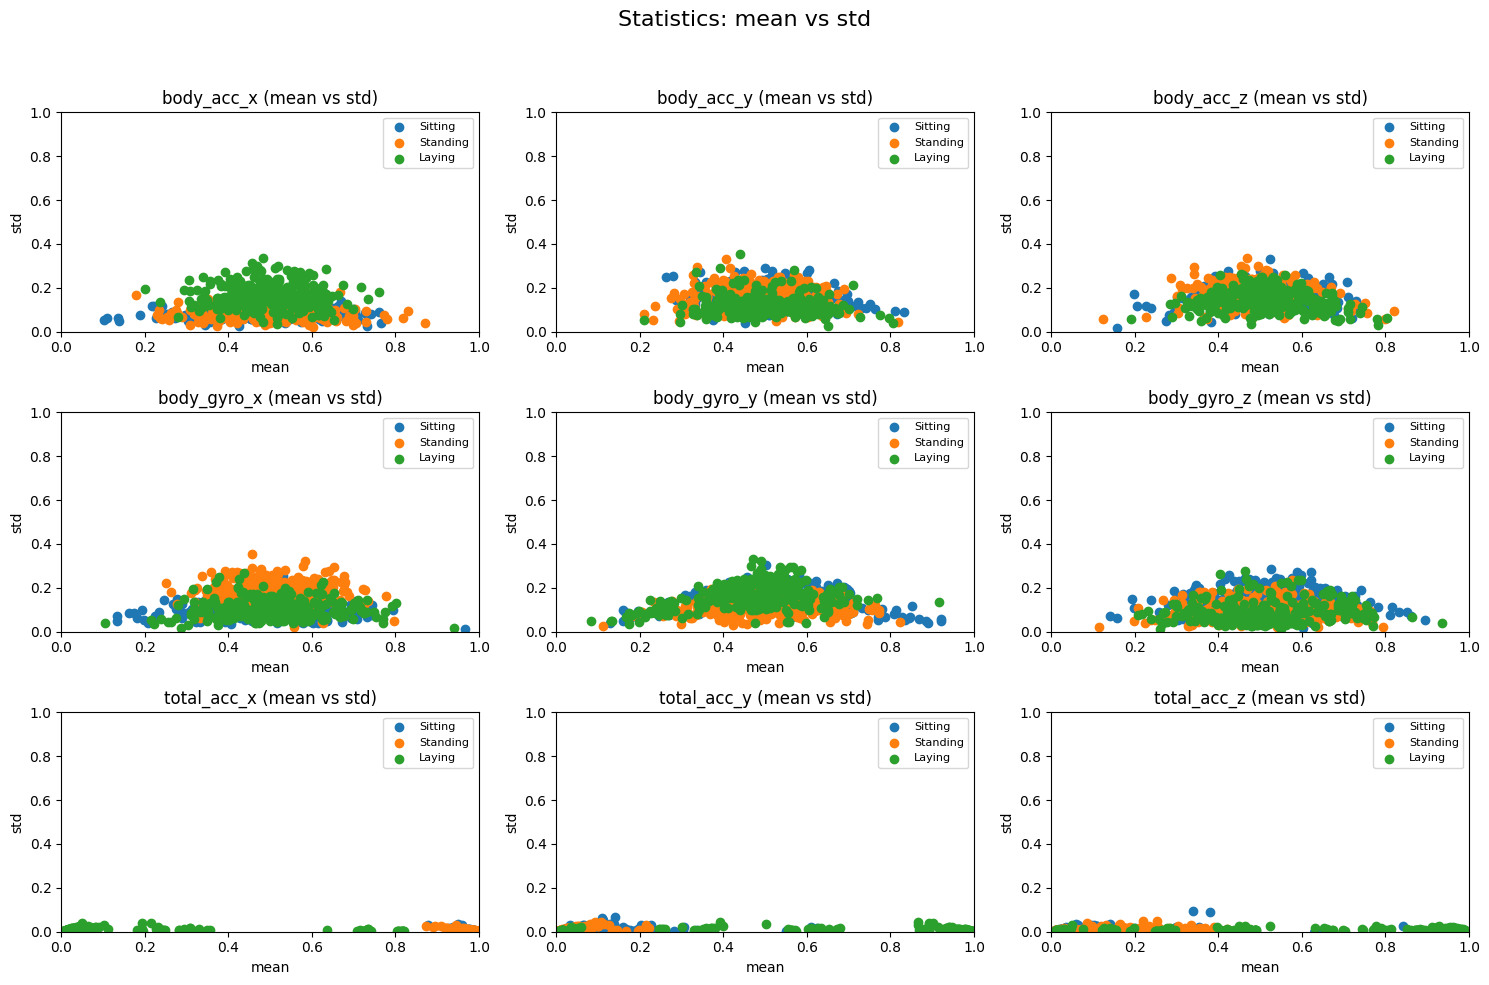

In [19]:
# Plot statistics by stats1 (x-axis) and stats2 (y-axis) and by feature, labels differ by color
def plot_stats_2d(stats1: str, stats2: str, data: dict, accepted_labels: list = [0, 1, 2, 3, 4, 5]):
    """
    Plot statistics by stats1 (x-axis) and stats2 (y-axis) and by feature, labels differ by color
    """
    data1 = data[stats1]
    data2 = data[stats2]
    # Create a figure contains 3x3 subplots for 3 groups
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle(f"Statistics: {stats1} vs {stats2}", fontsize=16)
    for i, group in enumerate(groups):
        for j, feature in enumerate(group):
            ax = axes[i, j]
            for label in accepted_labels:
                ax.scatter(data1[data1['label'] == label][feature], data2[data2['label'] == label][feature], label=labels[label])
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            # Set labels
            ax.set_xlabel(stats1)
            ax.set_ylabel(stats2)
            ax.set_title(f"{feature} ({stats1} vs {stats2})")
            ax.legend(loc="upper right", fontsize=8)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_stats_3d(stats1: str, stats2: str, stats3: str, data: dict, accepted_labels: list = [0, 1, 2, 3, 4, 5]):
    """
    Plot statistics by stats1 (x-axis), stats2 (y-axis) and stats3 (z-axis) and by feature, labels differ by color
    """
    data1 = data[stats1]
    data2 = data[stats2]
    data3 = data[stats3]
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(f"Statistics: {stats1} vs {stats2} vs {stats3}", fontsize=16)
    for i, group in enumerate(groups):
        for j, feature in enumerate(group):
            ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection='3d')
            for label in accepted_labels:
                ax.scatter(
                    data1[data1['label'] == label][feature],
                    data2[data2['label'] == label][feature],
                    data3[data3['label'] == label][feature],
                    label=labels[label]
                )
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.set_zlim(0, 1)
            ax.set_title(f"{feature} ({stats1} vs {stats2} vs {stats3})")
            ax.set_xlabel(stats1)
            ax.set_ylabel(stats2)
            ax.set_zlabel(stats3)
            ax.legend(loc="upper right", fontsize=8)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_stats_kde(stats1: str, stats2: str, data: dict, accepted_labels: list = [0, 1, 2, 3, 4, 5]):
    """
    Plot KDE (Kernel Density Estimate) by stats1 (x-axis) and stats2 (y-axis) and by feature, labels differ by color
    """
    data1 = data[stats1]
    data2 = data[stats2]
    # Create a figure containing 3x3 subplots for 3 groups
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle(f"KDE: {stats1} vs {stats2}", fontsize=16)
    for i, group in enumerate(groups):
        for j, feature in enumerate(group):
            ax = axes[i, j]
            for label in accepted_labels:
                subset1 = data1[data1['label'] == label][feature]
                subset2 = data2[data2['label'] == label][feature]
                sns.kdeplot(x=subset1, y=subset2, ax=ax, label=labels[label], fill=True, alpha=0.5)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.set_title(f"{feature} ({stats1} vs {stats2})")
            ax.legend(loc="upper right", fontsize=8, title="Labels")  # Add legend with title for each subplot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
plot_stats_2d("mean", "std", stats_data, accepted_labels=[3, 4, 5])
# plot_stats_3d("max", "min", "mean", stats_data, accepted_labels=[3, 4, 5])
# plot_stats_kde("max", "min", stats_data, accepted_labels=[3, 4, 5])

In [21]:
denoised_df

,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,sample_id,label
0,"[0.8134470268444527, 0.7671022465873518, 0.653...","[0.12080440117378519, 0.0972606659096068, 0.15...","[0.8287420888868229, 0.8861559315599029, 0.904...","[0.9174593033994335, 0.8679329394085404, 0.802...","[0.7928474773548563, 0.7536094416374213, 0.665...","[0.5187201279907382, 0.3484424875276291, 0.208...","[0.8915922385030814, 0.8362748987297561, 0.710...","[0.15987614148078824, 0.12815493192845298, 0.2...","[0.519772513948452, 0.6675004129195348, 0.7438...",0,4
1,"[0.7036244536916272, 0.7133747340509544, 0.729...","[0.6580597473866776, 0.6048607786670487, 0.487...","[0.16817520810807687, 0.15551403501192884, 0.1...","[0.8023641837511468, 0.7642225011901089, 0.743...","[0.10277734390291646, 0.09100352319436292, 0.1...","[0.577074322381726, 0.5739382733173558, 0.5536...","[0.7115388051277272, 0.7198790753200779, 0.735...","[0.6094638806860755, 0.5415608588486978, 0.402...","[0.16055910973510323, 0.1546173130402619, 0.15...",1,4
2,"[0.7813367441088455, 0.7239426043957364, 0.656...","[0.912173475812968, 0.884889249217113, 0.82604...","[0.5939041106936092, 0.5531202524102521, 0.480...","[0.13145031910671556, 0.07779347775543215, 0.0...","[0.26327004356799033, 0.2899935354240946, 0.30...","[0.45447745909165493, 0.4449427979013565, 0.43...","[0.6408525919031547, 0.5862381263573456, 0.521...","[0.80918501162309, 0.7865504621530551, 0.73322...","[0.6471213628945587, 0.6056211439716594, 0.531...",2,4
3,"[0.31889504210292785, 0.23123818094930298, 0.1...","[0.5208493265123959, 0.6702711054260931, 0.768...","[0.5091116317104245, 0.6426555507874743, 0.733...","[0.5713705111779405, 0.5267228596660835, 0.481...","[0.7575524469744713, 0.6174910396412965, 0.444...","[0.39200401627325937, 0.5302069607764031, 0.67...","[0.46208897001825483, 0.37720362081468356, 0.3...","[0.6041295168704224, 0.7270907398097779, 0.807...","[0.511177362604688, 0.6428092571485207, 0.7314...",3,4
4,"[0.22614462868959828, 0.33935501177200966, 0.4...","[0.40109446131656734, 0.3661055529034159, 0.31...","[0.7818266072200516, 0.7749414788882061, 0.713...","[0.4349062058235324, 0.4470523937226326, 0.470...","[0.2175270420358115, 0.21371304963476057, 0.23...","[0.6703731884907841, 0.6872246462782591, 0.676...","[0.29393363506788794, 0.3978920257057829, 0.50...","[0.7795389031164557, 0.7327877370745648, 0.662...","[0.9283113920441045, 0.9228059502875341, 0.865...",4,4
...,...,...,...,...,...,...,...,...,...,...,...
2942,"[0.5075576278964894, 0.5696388004671563, 0.626...","[0.8140452488823412, 0.7550155010992997, 0.682...","[0.3442567076909785, 0.31050007447437533, 0.27...","[0.5048692304699839, 0.48726205112402443, 0.48...","[0.5214678577949916, 0.5218012466893713, 0.519...","[0.5899696814012311, 0.6124235164604941, 0.641...","[0.5014845676992747, 0.5631978242592238, 0.620...","[0.7994264393690279, 0.735618089220393, 0.6576...","[0.3590368876294002, 0.3248988326231086, 0.285...",2942,1
2943,"[0.30054622748694687, 0.3246696488388191, 0.34...","[0.8556488885962958, 0.8515150978945498, 0.845...","[0.5259368631734027, 0.527728525486451, 0.5171...","[0.3464725420048574, 0.3439881727014766, 0.336...","[0.5401579548597437, 0.5346936774724653, 0.530...","[0.6156051851903503, 0.6123772693661723, 0.607...","[0.301042935504657, 0.32485189924099583, 0.347...","[0.8706635965981053, 0.8663998593264121, 0.860...","[0.5291625193668029, 0.53132621655501, 0.52063...",2943,1
2944,"[0.15813706598568494, 0.1740004610223649, 0.20...","[0.7079148836226287, 0.7332148206797022, 0.754...","[0.514840692609589, 0.4878080753131048, 0.4673...","[0.9353540586923323, 0.9399041015290721, 0.951...","[0.30861557347645413, 0.2905418488221226, 0.32...","[0.03471475998812645, 0.04746953300386613, 0.0...","[0.16145059908068232, 0.17732516100602236, 0.2...","[0.718056965275629, 0.7420301004941833, 0.7615...","[0.5184981662746043, 0.4915939522027044, 0.471...",2944,1
2945,"[0.25617560375

C:\Users\tungq\AppData\Local\Temp\ipykernel_94776\2922392842.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda arr: smooth(arr) if isinstance(arr, np.ndarray) else arr)


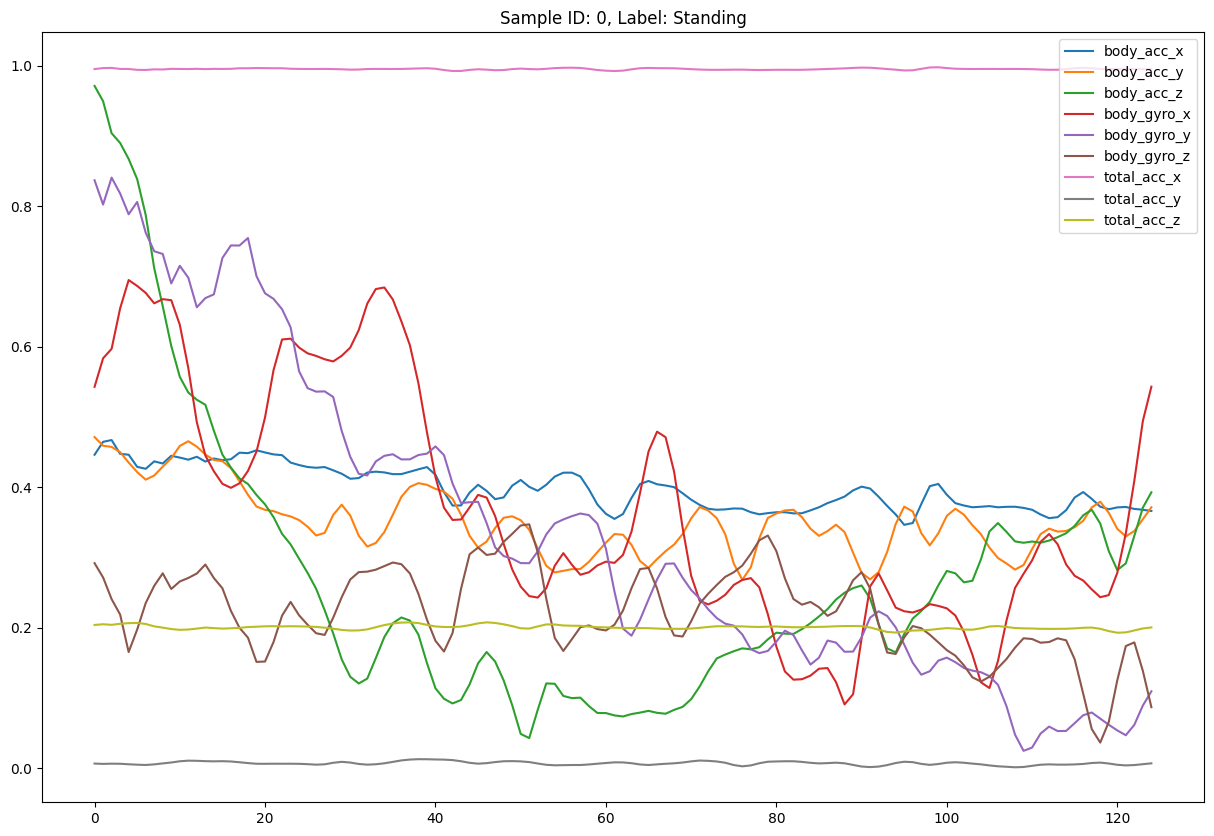

In [40]:
group_scaled_denoised = denoise(group_scaled, window_size=3)
plot_data(0, group_scaled_denoised)

In [41]:
# Export denoised grouply scaled data
group_scaled_denoised.to_csv('../structured_data/group_scaled_denoised-train.csv', index=False)